In [3]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
learning_rate = 0.01
training_epochs = 100

In [11]:
x_train = np.linspace(-1, 1, 200)

In [12]:
num_coef = 6
y_coef = [1, 2, -3, 4, 0, 1]
y_train = 0
for i in range(num_coef):
    y_train += y_coef[i] * np.power(x_train, i)

In [13]:
print(x_train.shape, y_train.shape)

(200,) (200,)


In [14]:
y_train += np.random.randn(x_train.shape[0]) * 1.3

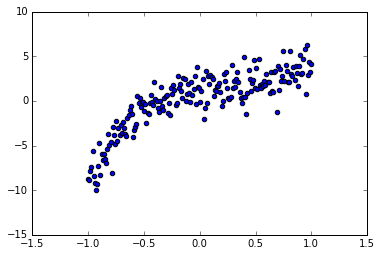

In [15]:
plt.scatter(x_train, y_train)

In [17]:
X = tf.placeholder(tf.float32, name = "x_train")
Y = tf.placeholder(tf.float32, name = "y_train")

In [18]:
def model(X, w):
    terms =  []
    for i in range(num_coef):
        term = tf.multiply(w[i], tf.pow(X, i, name="power"), name="multiply")
        terms.append(term)
    return tf.add_n(terms, name="addition")

In [19]:
w = tf.Variable([0.] * num_coef, name="parameters")
y_model = model(X, w)

In [22]:
cost = tf.reduce_sum(tf.square(Y-y_model, name="difference_square"), name="cost")

In [23]:
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [24]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)
for epoch in range(training_epochs):
    for (x, y) in zip(x_train, y_train):
        sess.run(train_op, feed_dict = {X:x, Y:y})

In [25]:
weight = sess.run(w)

In [27]:
print(weight)

[ 1.24667096  1.96182597 -2.17504096  3.48686552 -1.86772323  1.52942777]


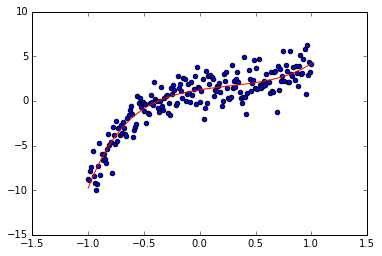

In [29]:
plt.scatter(x_train, y_train)
y = 0
for i in range(num_coef):
    y += weight[i] * np.power(x_train, i)
plt.plot(x_train, y, 'r')
plt.show()

In [30]:
tf.summary.FileWriter("./polynomial_regression", sess.graph)